# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $T=50, J=β=1, h=0, m⁰ = 0.5, k=3$.

In [1]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs, Plots, LaTeXStrings
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [2]:
T = 30         # final time
k = 3          # degree
m⁰ = 0.5       # magnetization at time zero

β = 1.0
J = 1.0
h = 0.0;

In [3]:
wᵢ = fill(HomogeneousGlauberFactor(J, h, β), T+1)
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = mpbp_infinite_graph(k, wᵢ, 2, ϕᵢ)
cb = CB_BP(bp);

In [4]:
matrix_sizes = [5, 15]
maxiters = fill(50, length(matrix_sizes))
iters = zeros(Int, length(maxiters))
tol = 1e-4
for i in eachindex(maxiters)
    iters[i], _ = iterate!(bp; maxiter=maxiters[i], svd_trunc=TruncBond(matrix_sizes[i]), cb, tol)
end

┌ Warning: #= /home/stecrotti/.julia/packages/Tullio/NGyNM/src/macro.jl:1093 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ MatrixProductBP.Models /home/stecrotti/.julia/packages/LoopVectorization/QZZfk/src/condense_loopset.jl:1148
┌ Warning: #= /home/stecrotti/.julia/packages/Tullio/NGyNM/src/macro.jl:1093 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ MatrixProductBP.Models /home/stecrotti/.julia/packages/LoopVectorization/QZZfk/src/condense_loopset.jl:1148


Running MPBP: iter 2 	 Time: 0:00:11
  Δ:                0.30921967502389647
  SVD Matrix size:  5

Running MPBP: iter 7 	 Time: 0:00:12
  Δ:                0.6734129469489272
  SVD Matrix size:  5

Running MPBP: iter 11 	 Time: 0:00:12
  Δ:                0.058610157263517815
  SVD Matrix size:  5

Running MPBP: iter 14 	 Time: 0:00:12
  Δ:                0.013021974300158945
  SVD Matrix size:  5

Running MPBP: iter 17 	 Time: 0:00:12
  Δ:                0.005015827953472218
  SVD Matrix size:  5

Running MPBP: iter 20 	 Time: 0:00:12
  Δ:                0.0006638764604860459
  SVD Matrix size:  5

Running MPBP: iter 23 	 Time: 0:00:13
  Δ:                0.00011872656438560725
  SVD Matrix size:  5

Running MPBP: iter 25 	 Time: 0:00:13
  Δ:                0.049385460671999226
  SVD Matrix size:  15

Running MPBP: iter 26 	 Time: 0:00:18
  Δ:                0.020841233409978788
  SVD Matrix size:  15

Running MPBP: iter 27 	 Time: 0:00:23
  Δ:                0.018308980018233223
  SVD Matrix size:  15

Running MPBP: iter 28 	 Time: 0:00:29
  Δ:                0.013326845025253942
  SVD Matrix size:  15

Running MPBP: iter 29 	 Time: 0:00:34
  Δ:                0.0075305391801734345
  SVD Matrix size:  15

Running MPBP: iter 30 	 Time: 0:00:39
  Δ:                0.00544910225538664
  SVD Matrix size:  15

Running MPBP: iter 31 	 Time: 0:00:44
  Δ:                0.003329383945673614
  SVD Matrix size:  15

Running MPBP: iter 32 	 Time: 0:00:49
  Δ:                0.0024306991561837687
  SVD Matrix size:  15

Running MPBP: iter 33 	 Time: 0:00:54
  Δ:                0.0015774383254796298
  SVD Matrix size:  15

Running MPBP: iter 34 	 Time: 0:00:59
  Δ:                0.0013885930199535323
  SVD Matrix size:  15

Running MPBP: iter 35 	 Time: 0:01:05
  Δ:                0.0011262754175187517
  SVD Matrix size:  15

Running MPBP: iter 36 	 Time: 0:01:10
  Δ:                0.0010174135004068496
  SVD Matrix size:  15

Running MPBP: iter 37 	 Time: 0:01:15
  Δ:                0.0009341780393887777
  SVD Matrix size:  15

Running MPBP: iter 38 	 Time: 0:01:20
  Δ:                0.000848818797873907
  SVD Matrix size:  15

Running MPBP: iter 39 	 Time: 0:01:25
  Δ:                0.000756408384437135
  SVD Matrix size:  15

Running MPBP: iter 40 	 Time: 0:01:30
  Δ:                0.0006413619502159129
  SVD Matrix size:  15

Running MPBP: iter 41 	 Time: 0:01:35
  Δ:                0.000619200524739183
  SVD Matrix size:  15

Running MPBP: iter 42 	 Time: 0:01:40
  Δ:                0.00047410402303649235
  SVD Matrix size:  15

Running MPBP: iter 43 	 Time: 0:01:44
  Δ:                0.0003965155276501875
  SVD Matrix size:  15

Running MPBP: iter 44 	 Time: 0:01:49
  Δ:                0.00031733946849965555
  SVD Matrix size:  15

Running MPBP: iter 45 	 Time: 0:01:54
  Δ:                0.0002057988698966895
  SVD Matrix size:  15

Running MPBP: iter 46 	 Time: 0:01:58
  Δ:                0.00020618239033698416
  SVD Matrix size:  15

Running MPBP: iter 47 	 Time: 0:02:03
  Δ:                0.0001424878696225651
  SVD Matrix size:  15

Running MPBP: iter 48 	 Time: 0:02:08
  Δ:                0.00014331839260850465
  SVD Matrix size:  15

Running MPBP: iter 49 	 Time: 0:02:12
  Δ:                0.00010333820989716358
  SVD Matrix size:  15

Running MPBP: iter 50 	 Time: 0:02:18
  Δ:                0.00010453533486498578
  SVD Matrix size:  15

Running MPBP: iter 51 	 Time: 0:02:23
  Δ:                7.772065414424212e-5
  SVD Matrix size:  15

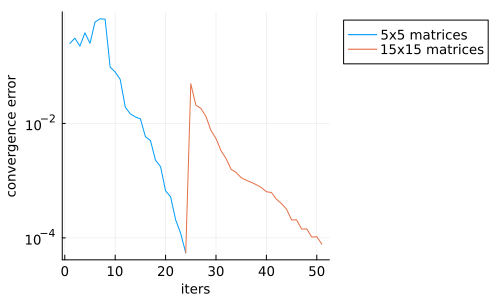

In [5]:
iters_cum = cumsum(iters)
inds = 1:iters_cum[1]
pl = plot(inds, cb.Δs[inds], label="$(matrix_sizes[1])x$(matrix_sizes[1]) matrices")
for i in 2:length(iters)
    inds = iters_cum[i-1]:iters_cum[i]
   plot!(pl, inds, cb.Δs[inds], label="$(matrix_sizes[i])x$(matrix_sizes[i]) matrices")
end
plot(pl, ylabel="convergence error", xlabel="iters", yaxis=:log10, size=(500,300), legend=:outertopright)

In [6]:
spin(x, i) = 3-2x
spin(x) = spin(x, 0)
m = only(means(spin, bp));

In [8]:
pb = pair_beliefs_as_mpem(bp)[1][1]
compress!(pb; svd_trunc=TruncBond(15))
mtu = marginals_tu(pb; Δtmax=1)
r = [expectation(spin, dropdims(sum(sum(mtu[t,t+1], dims=2), dims=3); dims=(2,3))) 
    for t in 1:T];

In [9]:
m_eq, r_eq, e_eq = equilibrium_observables(RandomRegular(k), J; β, h)

(m = 0.9917570032084977, r = 0.9861516673634358, e = -1.4792275010451537)

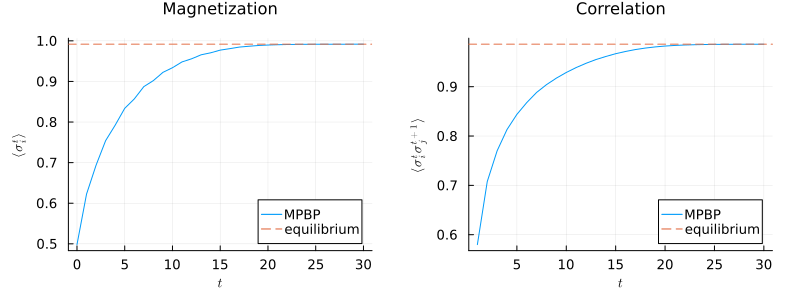

In [10]:
pl_m = plot(0:T, m, xlabel=L"t", ylabel=L"\langle \sigma_i^t \rangle", msc=:auto,
    size=(500,300), xticks=0:5:T, ms=2, label="MPBP", legend=:bottomright)
hline!(pl_m, [m_eq], label="equilibrium", ls=:dash, title="Magnetization")

pl_r = plot(1:T, r, xlabel=L"t", ylabel=L"\langle \sigma_i^t\sigma_j^{t+1} \rangle", msc=:auto,
    size=(500,300), xticks=0:5:T, ms=2, label="MPBP", legend=:bottomright)
hline!(pl_r, [r_eq], label="equilibrium", ls=:dash, title="Correlation")

plot(pl_m, pl_r, size=(800,300), margin=5Plots.mm)